<a href="https://colab.research.google.com/github/jacklu98/python-random-quote/blob/master/%E2%80%9Cregression1120_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = EMNIST(root='data/', split="balanced", download = True)
len(dataset)

112800

In [ ]:
test_dataset = EMNIST(root='data/', split="balanced", train=False)
len(test_dataset)

18800

In [ ]:
idx = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
       "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",
       "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
       "a", "b", "d", "e", "f", "g", "h", "n", "q", "r", "t"]

label:  B


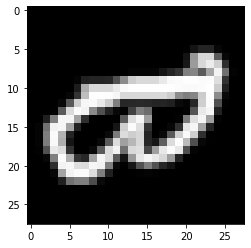

In [ ]:
j = 0
for i in range(len(dataset)):
  image, label = dataset[i]
  if label == 11: 
    j += 1
    if j == 3:
      break
plt.imshow(image, cmap='gray')
print("label: ", idx[label])

In [ ]:
# EMNIST dataset (images and labels)
dataset = EMNIST(root='data/', 
                train=True, split="balanced",
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 45


In [ ]:
train_ds, val_ds = random_split(dataset, [94000, 18800])
len(train_ds), len(val_ds)

(94000, 18800)

In [ ]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
input_size  = 28 * 28
num_classes = 47
model = nn.Linear(input_size, num_classes)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0339,  0.0023, -0.0161,  ...,  0.0107,  0.0328, -0.0228],
         [ 0.0004, -0.0018, -0.0312,  ..., -0.0159,  0.0057,  0.0202],
         [ 0.0115, -0.0061,  0.0197,  ..., -0.0045, -0.0338, -0.0032],
         ...,
         [-0.0323,  0.0059,  0.0151,  ...,  0.0282, -0.0301,  0.0132],
         [-0.0253, -0.0209, -0.0102,  ...,  0.0168,  0.0350,  0.0181],
         [ 0.0237,  0.0220, -0.0353,  ..., -0.0328,  0.0067, -0.0312]],
        requires_grad=True), Parameter containing:
 tensor([-0.0261, -0.0072,  0.0078, -0.0033, -0.0118,  0.0324, -0.0263,  0.0117,
         -0.0260, -0.0167,  0.0154,  0.0018,  0.0201, -0.0017,  0.0154, -0.0234,
          0.0239,  0.0042, -0.0015,  0.0164,  0.0326, -0.0021,  0.0182,  0.0265,
         -0.0242,  0.0239,  0.0268, -0.0053, -0.0048, -0.0099,  0.0055,  0.0024,
          0.0343,  0.0199, -0.0010,  0.0207, -0.0149,  0.0323, -0.0065,  0.0030,
          0.0111, -0.0252, -0.0073, -0.0297,  0.0250,  0.0109, -0.0236],
       

In [ ]:
for images, labels in train_loader:
    images = images.reshape(-1,784)
    print(labels.shape)
    print(images.shape)
    outputs = model(images)
    print(outputs[0])
    break

torch.Size([128])
torch.Size([128, 784])
tensor([-0.0517, -0.0272, -0.0930,  0.0523, -0.2456,  0.1628,  0.1693, -0.0493,
        -0.3648, -0.1576, -0.1043,  0.2624,  0.0018, -0.0569,  0.1928, -0.2397,
        -0.0073,  0.1383, -0.2729, -0.3452,  0.2340,  0.2186, -0.1077, -0.0258,
         0.0758, -0.0217, -0.0636,  0.0153,  0.0294, -0.0017,  0.3785,  0.0463,
        -0.2566,  0.0650,  0.1613,  0.1934,  0.1273,  0.1574, -0.1801,  0.0060,
        -0.1820,  0.1230, -0.0251, -0.2153,  0.0710,  0.1263, -0.0613],
       grad_fn=<SelectBackward0>)


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=47, bias=True)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0127, -0.0129, -0.0162,  ..., -0.0304,  0.0153,  0.0339],
         [-0.0237, -0.0016, -0.0063,  ..., -0.0222,  0.0041,  0.0077],
         [ 0.0053, -0.0158, -0.0343,  ..., -0.0071, -0.0164, -0.0153],
         ...,
         [ 0.0289,  0.0091,  0.0311,  ...,  0.0273, -0.0327,  0.0063],
         [ 0.0059,  0.0017, -0.0270,  ...,  0.0281,  0.0337, -0.0317],
         [-0.0171,  0.0232, -0.0212,  ...,  0.0283, -0.0303, -0.0343]],
        requires_grad=True), Parameter containing:
 tensor([-0.0157, -0.0314, -0.0092,  0.0241, -0.0042, -0.0115, -0.0301,  0.0142,
          0.0101, -0.0089, -0.0241, -0.0253,  0.0143,  0.0192,  0.0312, -0.0034,
         -0.0171, -0.0347,  0.0133, -0.0206, -0.0317,  0.0183, -0.0002,  0.0026,
         -0.0054, -0.0207, -0.0063,  0.0180,  0.0323, -0.0175, -0.0115, -0.0346,
          0.0088, -0.0324, -0.0245, -0.0073, -0.0336,  0.0344, -0.0271,  0.0193,
          0.0143, -0.0264,  0.0288, -0.0250, -0.0036, -0.0199,  0.0073],
       

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    print(outputs[:2])
    break

torch.Size([128, 1, 28, 28])
tensor([[-0.2798, -0.0436, -0.1798, -0.1315, -0.1275, -0.0944, -0.0214,  0.1622,
          0.2356,  0.1672, -0.4413, -0.3946, -0.0950, -0.0404, -0.1755,  0.1099,
         -0.1341,  0.0494, -0.0010, -0.2500, -0.3131, -0.0343, -0.0893,  0.1633,
         -0.0381, -0.2621, -0.1009, -0.1246,  0.0992,  0.1482, -0.1679, -0.2437,
          0.1199, -0.0543, -0.0497, -0.0463, -0.1968,  0.1591,  0.0457, -0.1464,
          0.0859,  0.0412,  0.1479,  0.0304,  0.2362, -0.1866,  0.1280],
        [-0.0423, -0.2950, -0.2739,  0.1056,  0.2390,  0.0752, -0.0816,  0.5641,
         -0.0731,  0.0719, -0.0757, -0.0052, -0.2731,  0.0651, -0.0246,  0.3086,
         -0.1831,  0.0124,  0.0197,  0.0349,  0.1361, -0.1671,  0.0285, -0.2666,
          0.0930, -0.1099, -0.2243,  0.0973,  0.1959,  0.1029,  0.1809, -0.0362,
         -0.0986,  0.3003, -0.2406, -0.1476,  0.1658, -0.1198,  0.3549, -0.1605,
         -0.1010, -0.1841, -0.0723,  0.2052,  0.0363,  0.0773,  0.3199]],
       grad_fn

In [ ]:
probs = F.softmax(outputs, dim = 1)
print(probs[:2])
print(torch.sum(probs[0]).item())

tensor([[0.0167, 0.0211, 0.0184, 0.0194, 0.0194, 0.0201, 0.0216, 0.0260, 0.0279,
         0.0261, 0.0142, 0.0149, 0.0201, 0.0212, 0.0185, 0.0246, 0.0193, 0.0232,
         0.0220, 0.0172, 0.0161, 0.0213, 0.0202, 0.0260, 0.0212, 0.0170, 0.0200,
         0.0195, 0.0244, 0.0256, 0.0187, 0.0173, 0.0249, 0.0209, 0.0210, 0.0211,
         0.0181, 0.0259, 0.0231, 0.0191, 0.0241, 0.0230, 0.0256, 0.0228, 0.0280,
         0.0183, 0.0251],
        [0.0198, 0.0154, 0.0157, 0.0230, 0.0262, 0.0223, 0.0190, 0.0363, 0.0192,
         0.0222, 0.0192, 0.0206, 0.0157, 0.0220, 0.0202, 0.0281, 0.0172, 0.0209,
         0.0211, 0.0214, 0.0237, 0.0175, 0.0213, 0.0158, 0.0227, 0.0185, 0.0165,
         0.0228, 0.0251, 0.0229, 0.0248, 0.0199, 0.0187, 0.0279, 0.0162, 0.0178,
         0.0244, 0.0183, 0.0295, 0.0176, 0.0187, 0.0172, 0.0192, 0.0254, 0.0214,
         0.0223, 0.0284]], grad_fn=<SliceBackward0>)
1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(labels)

tensor([44,  7,  7,  7,  8,  8, 15,  8, 46, 15, 15, 15,  7, 38, 15, 15, 17, 15,
        42, 38, 13, 15, 42, 32, 15,  8, 15, 15,  8, 38, 38, 22, 15, 46, 15, 15,
        15,  7,  8,  7,  8, 45,  8, 15,  7, 15, 38, 42, 38, 15, 12, 42, 15,  5,
         6,  8, 45, 15, 46, 15, 15, 38, 15, 15, 15, 15, 15, 15, 42, 40, 15, 28,
         8,  1, 15, 15, 46, 15, 28,  8, 29, 45,  8, 15, 15, 15, 15, 38, 15, 37,
         7, 15, 15, 15,  5, 15,  8, 15, 15, 35, 15, 15, 45, 29, 38, 15,  7, 38,
         8,  7, 15,  8, 16,  8,  9,  7, 15, 15,  7, 42, 15, 38, 15, 15,  7, 15,
        45, 15])
tensor([46, 29, 34,  0,  0, 24, 45,  4,  7, 16, 35, 12, 46, 18, 12, 35, 16, 17,
        18, 12, 36, 28, 18,  7, 26, 26, 15,  2, 26, 14, 17, 21,  4, 34, 26, 33,
         5, 41, 34, 38, 43, 16, 28, 23, 12, 17, 10,  1, 19, 26,  6, 33, 43, 23,
        31, 10, 26, 34,  9, 22, 15, 33, 15, 10, 40, 26,  8, 33,  6, 13,  9, 18,
        26,  0, 12, 18,  5, 23, 19, 17, 46, 42, 36,  3, 11, 18,  4, 35, 22, 46,
        29, 13, 37, 36,

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(outputs, labels)

tensor(0.0234)

In [ ]:
outputs

tensor([[-0.2798, -0.0436, -0.1798,  ...,  0.2362, -0.1866,  0.1280],
        [-0.0423, -0.2950, -0.2739,  ...,  0.0363,  0.0773,  0.3199],
        [-0.0955, -0.0464, -0.1965,  ...,  0.0123,  0.1565, -0.1078],
        ...,
        [-0.3250,  0.0326, -0.4766,  ...,  0.1010,  0.2402,  0.1797],
        [ 0.0466, -0.1430,  0.1169,  ..., -0.2120,  0.4221, -0.0209],
        [-0.2832, -0.0894, -0.2188,  ...,  0.1668,  0.0996,  0.1865]],
       grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = F.cross_entropy
loss_fn(outputs, labels)

tensor(3.8690, grad_fn=<NllLossBackward0>)

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
    
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.029458211734890938, 'val_loss': 3.867483615875244}

In [ ]:
history1 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 3.6538, val_acc: 0.1394
Epoch [1], val_loss: 3.4748, val_acc: 0.2658
Epoch [2], val_loss: 3.3159, val_acc: 0.3495
Epoch [3], val_loss: 3.1726, val_acc: 0.4053
Epoch [4], val_loss: 3.0433, val_acc: 0.4366
Epoch [5], val_loss: 2.9265, val_acc: 0.4577
Epoch [6], val_loss: 2.8210, val_acc: 0.4753
Epoch [7], val_loss: 2.7255, val_acc: 0.4870
Epoch [8], val_loss: 2.6390, val_acc: 0.4959
Epoch [9], val_loss: 2.5607, val_acc: 0.5044
Epoch [10], val_loss: 2.4896, val_acc: 0.5116
Epoch [11], val_loss: 2.4249, val_acc: 0.5189
Epoch [12], val_loss: 2.3660, val_acc: 0.5239
Epoch [13], val_loss: 2.3123, val_acc: 0.5276
Epoch [14], val_loss: 2.2630, val_acc: 0.5331
Epoch [15], val_loss: 2.2178, val_acc: 0.5371
Epoch [16], val_loss: 2.1763, val_acc: 0.5405
Epoch [17], val_loss: 2.1380, val_acc: 0.5438
Epoch [18], val_loss: 2.1027, val_acc: 0.5475
Epoch [19], val_loss: 2.0700, val_acc: 0.5495


In [ ]:
history2 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.0396, val_acc: 0.5521
Epoch [1], val_loss: 2.0114, val_acc: 0.5545
Epoch [2], val_loss: 1.9851, val_acc: 0.5572
Epoch [3], val_loss: 1.9605, val_acc: 0.5594
Epoch [4], val_loss: 1.9375, val_acc: 0.5612
Epoch [5], val_loss: 1.9159, val_acc: 0.5632
Epoch [6], val_loss: 1.8956, val_acc: 0.5652
Epoch [7], val_loss: 1.8765, val_acc: 0.5666
Epoch [8], val_loss: 1.8586, val_acc: 0.5679
Epoch [9], val_loss: 1.8416, val_acc: 0.5704
Epoch [10], val_loss: 1.8255, val_acc: 0.5723
Epoch [11], val_loss: 1.8103, val_acc: 0.5735
Epoch [12], val_loss: 1.7958, val_acc: 0.5751
Epoch [13], val_loss: 1.7820, val_acc: 0.5773
Epoch [14], val_loss: 1.7689, val_acc: 0.5785
Epoch [15], val_loss: 1.7564, val_acc: 0.5799
Epoch [16], val_loss: 1.7446, val_acc: 0.5811
Epoch [17], val_loss: 1.7332, val_acc: 0.5820
Epoch [18], val_loss: 1.7223, val_acc: 0.5825
Epoch [19], val_loss: 1.7120, val_acc: 0.5840


In [ ]:
history3 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.7020, val_acc: 0.5854
Epoch [1], val_loss: 1.6924, val_acc: 0.5863
Epoch [2], val_loss: 1.6832, val_acc: 0.5873
Epoch [3], val_loss: 1.6743, val_acc: 0.5877
Epoch [4], val_loss: 1.6658, val_acc: 0.5898
Epoch [5], val_loss: 1.6576, val_acc: 0.5912
Epoch [6], val_loss: 1.6497, val_acc: 0.5929
Epoch [7], val_loss: 1.6421, val_acc: 0.5938
Epoch [8], val_loss: 1.6347, val_acc: 0.5951
Epoch [9], val_loss: 1.6275, val_acc: 0.5960
Epoch [10], val_loss: 1.6206, val_acc: 0.5966
Epoch [11], val_loss: 1.6140, val_acc: 0.5973
Epoch [12], val_loss: 1.6075, val_acc: 0.5979
Epoch [13], val_loss: 1.6013, val_acc: 0.5990
Epoch [14], val_loss: 1.5952, val_acc: 0.6000
Epoch [15], val_loss: 1.5893, val_acc: 0.6008
Epoch [16], val_loss: 1.5836, val_acc: 0.6020
Epoch [17], val_loss: 1.5780, val_acc: 0.6026
Epoch [18], val_loss: 1.5727, val_acc: 0.6033
Epoch [19], val_loss: 1.5674, val_acc: 0.6041


In [ ]:
history4 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.5623, val_acc: 0.6050
Epoch [1], val_loss: 1.5574, val_acc: 0.6058
Epoch [2], val_loss: 1.5525, val_acc: 0.6067
Epoch [3], val_loss: 1.5478, val_acc: 0.6066
Epoch [4], val_loss: 1.5432, val_acc: 0.6076
Epoch [5], val_loss: 1.5387, val_acc: 0.6086
Epoch [6], val_loss: 1.5344, val_acc: 0.6093
Epoch [7], val_loss: 1.5301, val_acc: 0.6098
Epoch [8], val_loss: 1.5259, val_acc: 0.6103
Epoch [9], val_loss: 1.5219, val_acc: 0.6111
Epoch [10], val_loss: 1.5179, val_acc: 0.6115
Epoch [11], val_loss: 1.5140, val_acc: 0.6119
Epoch [12], val_loss: 1.5102, val_acc: 0.6126
Epoch [13], val_loss: 1.5065, val_acc: 0.6131
Epoch [14], val_loss: 1.5029, val_acc: 0.6140
Epoch [15], val_loss: 1.4994, val_acc: 0.6145
Epoch [16], val_loss: 1.4959, val_acc: 0.6145
Epoch [17], val_loss: 1.4925, val_acc: 0.6153
Epoch [18], val_loss: 1.4891, val_acc: 0.6164
Epoch [19], val_loss: 1.4859, val_acc: 0.6166


In [ ]:
history5 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4827, val_acc: 0.6170
Epoch [1], val_loss: 1.4796, val_acc: 0.6174
Epoch [2], val_loss: 1.4765, val_acc: 0.6181
Epoch [3], val_loss: 1.4735, val_acc: 0.6182
Epoch [4], val_loss: 1.4705, val_acc: 0.6191
Epoch [5], val_loss: 1.4676, val_acc: 0.6191
Epoch [6], val_loss: 1.4648, val_acc: 0.6194
Epoch [7], val_loss: 1.4620, val_acc: 0.6198
Epoch [8], val_loss: 1.4593, val_acc: 0.6202
Epoch [9], val_loss: 1.4566, val_acc: 0.6205
Epoch [10], val_loss: 1.4539, val_acc: 0.6212
Epoch [11], val_loss: 1.4513, val_acc: 0.6218
Epoch [12], val_loss: 1.4488, val_acc: 0.6220
Epoch [13], val_loss: 1.4462, val_acc: 0.6228
Epoch [14], val_loss: 1.4438, val_acc: 0.6231
Epoch [15], val_loss: 1.4414, val_acc: 0.6236
Epoch [16], val_loss: 1.4390, val_acc: 0.6239
Epoch [17], val_loss: 1.4366, val_acc: 0.6242
Epoch [18], val_loss: 1.4343, val_acc: 0.6251
Epoch [19], val_loss: 1.4320, val_acc: 0.6261


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

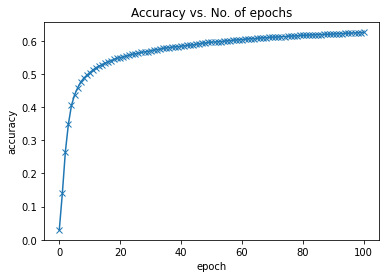

In [ ]:
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
# Define test dataset
test_dataset = EMNIST(root='data/', 
                     train=False, split="balanced",
                     transform=transforms.ToTensor())

img, label = test_dataset[0]
# plt.imshow(img, cmap="gray")
print(label)
img.shape

41


torch.Size([1, 28, 28])

In [ ]:

def predict_img(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred[0].item()
predict_img(img, model)

3

Label: 41 , Predicted: 3


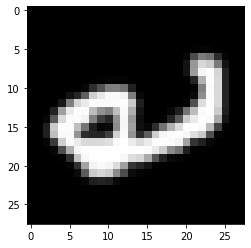

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

In [ ]:
for i in range(20):
    img, label = test_dataset[i]
    if label == predict_img(img, model):
        print('Label:', idx[label], ', Predicted:', idx[predict_img(img, model)], "Yes")
    else:
        print('Label:', idx[label], ', Predicted:', idx[predict_img(img, model)], "No")

Label: g , Predicted: 3 No
Label: e , Predicted: e Yes
Label: 9 , Predicted: 9 Yes
Label: Q , Predicted: Q Yes
Label: q , Predicted: 9 No
Label: X , Predicted: X Yes
Label: E , Predicted: E Yes
Label: B , Predicted: A No
Label: 3 , Predicted: 3 Yes
Label: C , Predicted: L No
Label: G , Predicted: G Yes
Label: 7 , Predicted: 7 Yes
Label: 2 , Predicted: 2 Yes
Label: G , Predicted: Q No
Label: G , Predicted: 0 No
Label: R , Predicted: R Yes
Label: 6 , Predicted: 6 Yes
Label: q , Predicted: V No
Label: S , Predicted: S Yes
Label: r , Predicted: T No


In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.6188540458679199, 'val_loss': 1.4539575576782227}